## QUESTION NUMBER 1

In [11]:
import numpy as np

# 1. Initialize weights and bias
w = np.zeros(2)
b = 0.0
learning_rate = 0.01
epochs = 1000
lambdaReg = 0.01  # Regularization strength

# Dataset: [x1, x2, label]
data = [
    [1.2, 1.0, 1],
    [2.0, 1.3, 1],
    [2.5, 0.8, 1],
    [1.8, 1.6, 1],
    [3.0, 1.1, 1],
    [2.2, 1.8, 1],
    [6.0, 6.5, -1],
    [6.5, 5.8, -1],
    [7.2, 6.2, -1],
    [5.9, 5.0, -1],
    [7.0, 6.8, -1],
    [6.3, 5.4, -1]
]

In [ ]:
# 2. Use hinge loss and gradient descent
def totalHingeLoss(data, w, b, lambdaReg=0.01):  
    loss = 0
    for x1, x2, y in data:
        x = np.array([x1, x2])
        margin = y * (np.dot(w, x) + b)
        loss += max(0, 1 - margin)
    # Add regularization term
    loss = loss / len(data) + 0.5 * lambdaReg * np.dot(w, w)
    return loss

def gradientDescent(data, w, b, lr=0.01, lambdaReg=0.01):
    dw = np.zeros_like(w)
    db = 0
    n = len(data)

    for x1, x2, y in data:
        x = np.array([x1, x2])
        condition = y * (np.dot(w, x) + b) >= 1
        if condition:
            dw += lambdaReg * w
            db += 0
        else:
            dw += lambdaReg * w - y * x
            db += -y

    w = w - lr * dw / n
    b = b - lr * db / n
    return w, b

In [ ]:
# 3. Update w and b using SVM rules
# 4. Train until loss stops improving
for ep in range(epochs):
    w, b = gradientDescent(data, w, b, learning_rate, lambdaReg)
    if ep % 100 == 0:
        loss = totalHingeLoss(data, w, b, lambdaReg)
        print(f"==== Epoch {ep}, Loss: {loss} ====")


==== Epoch 0, Loss: 0.8975016529513888 ====
==== Epoch 100, Loss: 0.49355456621390875 ====
==== Epoch 200, Loss: 0.3339053842591116 ====
==== Epoch 300, Loss: 0.1833970174387499 ====
==== Epoch 400, Loss: 0.12260889252179885 ====
==== Epoch 500, Loss: 0.07127419437265828 ====
==== Epoch 600, Loss: 0.049263800049766174 ====
==== Epoch 700, Loss: 0.036861221538923856 ====
==== Epoch 800, Loss: 0.025698992971271185 ====
==== Epoch 900, Loss: 0.01339291228887593 ====


In [ ]:
# 5. Predict class labels for all points
def predict(x, w, b):
    return 1 if np.dot(w, x) + b >= 0 else -1

print("\n==== Predictions: ====")
for point in data:
    x = np.array(point[:2])
    pred = predict(x, w, b)
    print(f"Point: {x}, Predicted class: {pred}")
    


==== Predictions: ====
Point: [1.2 1. ], Predicted class: 1
Point: [2.  1.3], Predicted class: 1
Point: [2.5 0.8], Predicted class: 1
Point: [1.8 1.6], Predicted class: 1
Point: [3.  1.1], Predicted class: 1
Point: [2.2 1.8], Predicted class: 1
Point: [6.  6.5], Predicted class: -1
Point: [6.5 5.8], Predicted class: -1
Point: [7.2 6.2], Predicted class: -1
Point: [5.9 5. ], Predicted class: -1
Point: [7.  6.8], Predicted class: -1
Point: [6.3 5.4], Predicted class: -1


In [ ]:
def accuracy(data, w, b):
    correct = 0
    for x1, x2, y in data:
        x = np.array([x1, x2])
        pred = predict(x, w, b)
        if pred == y:
            correct += 1
    return correct / len(data)
acc = accuracy(data, w, b)
print(f"\nTraining Accuracy: {acc * 100}%")


Training Accuracy: 100.0%


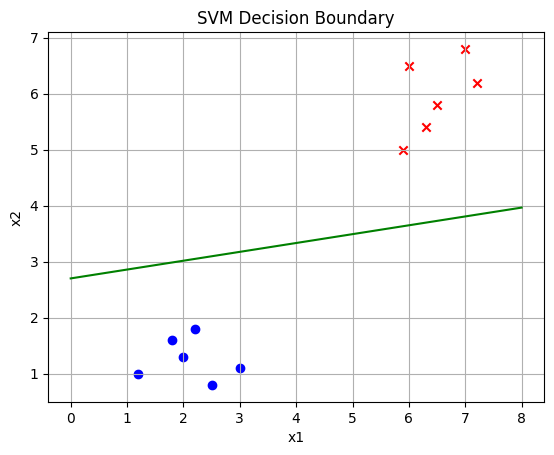

In [21]:
def plot(data, w, b):
    import matplotlib.pyplot as plt

    # Plot data points
    for x1, x2, y in data:
        if y == 1:
            plt.scatter(x1, x2, color='blue', marker='o')
        else:
            plt.scatter(x1, x2, color='red', marker='x')

    # Plot decision boundary
    x_values = np.linspace(0, 8, 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, color='green')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('SVM Decision Boundary')
    plt.grid()
    plt.show()
plot(data, w, b)

## Question Number 2

In [18]:
data2= [
    ['Male', 'Lahore', 'Basic', 'Yes'],
    ['Female', 'Karachi', 'Premium', 'No'],
    ['Male', 'Islamabad', 'Gold', 'Yes'],
    ['Female', 'Lahore', 'Premium', 'No'],
    ['Male', 'Karachi', 'Gold', 'Yes'],
    ['Female', 'Islamabad', 'Basic', 'No'],
    ['Male', 'Lahore', 'Gold', 'Yes'],
    ['Female', 'Karachi', 'Basic', 'No']
]

In [24]:
# Inspect data
# • Identify categorical features and target variable
import pandas as pd
df=pd.DataFrame(data2,columns=['Gender','City','PlanType','Subscribed'])
print(df.head())

# Inspect categorical features
print("\nCategorical Feature Values:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Subscribed']=le.fit_transform(df['Subscribed'])
df['Gender']=le.fit_transform(df['Gender'])
df['City']=le.fit_transform(df['City'])
df['PlanType']=le.fit_transform(df['PlanType'])

print("\nEncoded Data:")
print(df.head())

   Gender       City PlanType Subscribed
0    Male     Lahore    Basic        Yes
1  Female    Karachi  Premium         No
2    Male  Islamabad     Gold        Yes
3  Female     Lahore  Premium         No
4    Male    Karachi     Gold        Yes

Categorical Feature Values:
Gender: ['Male' 'Female']
City: ['Lahore' 'Karachi' 'Islamabad']
PlanType: ['Basic' 'Premium' 'Gold']
Subscribed: ['Yes' 'No']

Encoded Data:
   Gender  City  PlanType  Subscribed
0       1     2         0           1
1       0     1         2           0
2       1     0         1           1
3       0     2         2           0
4       1     1         1           1


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Subscribed', axis=1), df['Subscribed'], test_size=0.2, random_state=45)

In [57]:
# Updated totalHingeLoss for pandas DataFrames
def totalHingeLoss_df(X, y, w, b, lambdaReg=0.01):
    """
    Calculate hinge loss for pandas DataFrame input
    """
    loss = 0
    n = len(y)
    
    for i in range(n):
        x = X.iloc[i].values
        label = y.iloc[i]
        margin = label * (np.dot(w, x) + b)
        loss += max(0, 1 - margin)
    
    # Add regularization term
    loss = loss / n + 0.5 * lambdaReg * np.dot(w, w)
    return loss

In [ ]:
def train_svm(X, y):
    # Convert labels to 1 and -1 for SVM else error cz of label encoder
    if y.dtype == 'object':
        y = y.replace({'Yes': 1, 'No': -1})
    else:
        # Convert 0/1 to -1/1
        y = y.replace({0: -1, 1: 1})

    bias = 0.0
    weights = np.zeros(X.shape[1])
    learning_rate = 0.01
    lambdaReg = 0.01
    epochs = 1000

    for ep in range(epochs):
        dw = np.zeros_like(weights)
        db = 0
        n = len(y)

        for i in range(n):
            x = X.iloc[i].values
            label = y.iloc[i]
            condition = label * (np.dot(weights, x) + bias) >= 1
            if condition:
                dw += lambdaReg * weights
                db += 0
            else:
                dw += lambdaReg * weights - label * x
                db += -label

        weights = weights - learning_rate * dw / n
        bias = bias - learning_rate * db / n

        if ep % 100 == 0:
            loss = totalHingeLoss_df(X, y, weights, bias, lambdaReg)
            print(f"==== Epoch {ep}, Loss: {loss:.4f} ====")

    return weights, bias


In [ ]:
# Prediction
def predict(x, w, b):
    return 1 if np.dot(w, x) + b >= 0 else -1
w, b = train_svm(X_train, y_train)

print("\nPredictions:")
pred = np.dot(X_test, w) + b
pred = np.sign(pred)

pred_labels = np.where(pred == 1, 1, 0)
actual_labels = y_test.values

print("Predictions (0/1):", pred_labels)
print("Actual (0/1):", actual_labels)

accuracy = np.mean(pred_labels == actual_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\ Results:")
for i in range(len(X_test)):
    x = X_test.iloc[i].values
    pred_class = pred_labels[i]
    actual_class = actual_labels[i]
    print(f"Features: {x}, Predicted: {pred_class}, Actual: {actual_class}")

==== Epoch 0, Loss: 0.9961 ====
==== Epoch 100, Loss: 0.6111 ====
==== Epoch 200, Loss: 0.3803 ====
==== Epoch 300, Loss: 0.2760 ====
==== Epoch 400, Loss: 0.1919 ====
==== Epoch 500, Loss: 0.1579 ====
==== Epoch 600, Loss: 0.1383 ====
==== Epoch 700, Loss: 0.1209 ====
==== Epoch 800, Loss: 0.1039 ====
==== Epoch 900, Loss: 0.0863 ====

Predictions:
Predictions (0/1): [0 1]
Actual (0/1): [0 1]
Accuracy: 100.00%
\ Results:
Features: [0 0 0], Predicted: 0, Actual: 0
Features: [1 0 1], Predicted: 1, Actual: 1


## Question 3

In [61]:
data3=[
    [0,0,0],
    [0,1,0],
    [1,0,0],
    [1,1,1]
]

In [ ]:
# • Initialize weights with 0, bias with 0, learning rate with 0.1.
# • Loop through dataset for several epochs
# • Calculate prediction using step function
# • Update weights based on error
# • Display final weights and predictions

data3=[
    [0,0,0],
    [0,1,0],
    [1,0,0],
    [1,1,1]
]

w = np.zeros(2)
b = 0.0
learning_rate = 0.1
epochs = 10

def step_function(x):
    return 1 if x >= 0 else 0

for ep in range(epochs):
    for x1, x2, label in data3:
        x = np.array([x1, x2])

        # Prediction using step function
        pred = step_function(np.dot(w, x) + b)
        error = label - pred

        # Update weights and bias
        w += learning_rate * error * x
        b += learning_rate * error
    print(f"Epoch {ep+1}, Weights: {w}, Bias: {b}")

print("\nFinal Weights and Bias:")
print(f"Weights: {w}, Bias: {b}")
print("\nPredictions on training data:")
for x1, x2, label in data3:
    x = np.array([x1, x2])
    pred = step_function(np.dot(w, x) + b)
    print(f"Input: {x}, Predicted: {pred}, Actual: {label}")




## Question 4

In [76]:
data4 = [
    ['E01', 'Male', 'HR', 2, 'No'],
    ['E02', 'Female', 'IT', 3, 'Yes'],
    ['E03', 'Male', 'Finance', 4, 'Yes'],
    ['E04', 'Female', 'HR', 1, 'No'],
    ['E05', 'Male', 'IT', 5, 'Yes'],
    ['E06', 'Female', 'Finance', 2, 'No'],
    ['E07', 'Male', 'IT', 3, 'Yes'],
    ['E08', 'Female', 'HR', 4, 'Yes'],
    ['E09', 'Male', 'Finance', 1, 'No'],
    ['E10', 'Female', 'IT', 5, 'Yes']
]

In [ ]:
import pandas as pd
df=pd.DataFrame(data4,columns=['EmpID','Gender','Department','YearsExperience','Promoted'])
print(df.head())
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Promoted']=le.fit_transform(df['Promoted'])
df['Gender']=le.fit_transform(df['Gender'])
df['Department']=le.fit_transform(df['Department']) 

print("\nEncoded Data:")
print(df.head())

X=df.drop(['EmpID','Promoted'],axis=1)
y=df['Promoted']

w = np.zeros(X.shape[1])
b = 0.0
learning_rate = 0.1
# Single pass training
for i in range(len(y)):
    x = X.iloc[i].values
    label = y.iloc[i]

    # Prediction using step function
    pred = step_function(np.dot(w, x) + b)
    error = label - pred

    # Update weights and bias
    w += learning_rate * error * x
    b += learning_rate * error
print("\nFinal Weights and Bias after single pass:")
print(f"Weights: {w}, Bias: {b}")
print("\nPredictions on training data:")
pred = np.dot(X, w) + b
pred = np.array([step_function(p) for p in pred])
actual = y.values
print("Predictions (0/1):", pred)
print("Actual (0/1):", actual)
accuracy = np.mean(pred == actual)
print(f"Accuracy: {accuracy * 100}%")

  EmpID  Gender Department  YearsExperience Promoted
0   E01    Male         HR                2       No
1   E02  Female         IT                3      Yes
2   E03    Male    Finance                4      Yes
3   E04  Female         HR                1       No
4   E05    Male         IT                5      Yes

Encoded Data:
  EmpID  Gender  Department  YearsExperience  Promoted
0   E01       1           1                2         0
1   E02       0           2                3         1
2   E03       1           0                4         1
3   E04       0           1                1         0
4   E05       1           2                5         1

Final Weights and Bias after single pass:
Weights: [-0.1  0.2  0.2], Bias: -0.2

Predictions on training data:
Predictions (0/1): [1 1 1 1 1 1 1 1 0 1]
Actual (0/1): [0 1 1 0 1 0 1 1 0 1]
Accuracy: 70.0%
